# Spam Detection Model using Natural Language Processing

## Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the data

In [3]:
sms_data = pd.read_csv("C:\\Users\\Adarsh Singh\\Downloads\\SpamClassifier-master\\SpamClassifier-master\\smsspamcollection\\smsspamcollection", sep='\t',names=["label", "message"])

In [6]:
sms_data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### Creating a binary column for label

In [42]:
sms_data["bin_form"] = sms_data["label"].apply(lambda x: 1 if x == "ham" else 0)

In [43]:
sms_data.head(10)

,label,message,bin_form
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0
6,ham,Even my brother is not like to speak with me. ...,1
7,ham,As per your request 'Melle Melle (Oru Minnamin...,1
8,spam,WINNER!! As a valued network customer you have...,0
9,spam,Had your mobile 11 months or more? U R entitle...,0


### Count of labels in the dataset

In [53]:
sms_data["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0, 0.5, 'Count of Category')

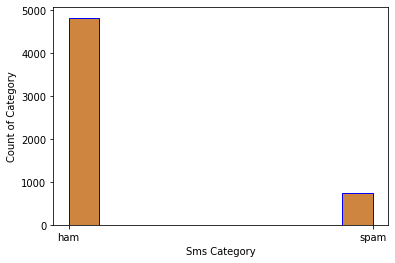

In [87]:
plt.hist(sms_data["label"], facecolor="peru", edgecolor='blue' )
plt.xlabel("Sms Category")
plt.ylabel("Count of Category")

## Import the Regex and NLTK libraries to perform Data Preprocessing

In [7]:
import re
import nltk

## Remove all the stopwords from messages

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Adarsh
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [33]:
def cleaning(st):
    s = re.sub('[^a-zA-Z]', ' ', st)
    s_lower = s.lower()
    s_lower = s_lower.split()
    return s_lower

In [34]:
temp = sms_data["message"].apply(cleaning)

In [35]:
temp

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, don, t, think, he, goes, to, usf, he,...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, con...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [36]:
without_stopwords = temp.apply(lambda x: [i for i in x if not i in stopwords.words('english')])

In [37]:
without_stopwords[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

## Perform the Stemming to get the root form of words

In [38]:
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()

In [39]:
def stem_word(st):
    s = [port_stem.stem(i) for i in st]
    s = ' '.join(s)
    return s

In [40]:
stemmed_msg = without_stopwords.apply(stem_word)

In [41]:
stemmed_msg[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## Build Bag of Words

### Import the countvectorizer to get vectors of data and user max_df as 20% as percentage of spam data is 20%

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.20)

## Fit the vetcore model to get the traget to be train

In [79]:
x = cv.fit_transform(stemmed_msg).toarray()

In [69]:
y = sms_data["bin_form"]

## Split the dataset to get the train test data

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## Using the Naive Bayes model to classify the message

In [71]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

### Fit the model

In [72]:
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predict the label for message

In [73]:
y_pred = model.predict(x_test)

## Using the confusion matrix to evaluate the model

In [74]:
from sklearn.metrics import confusion_matrix
matric = confusion_matrix(y_test, y_pred)

In [75]:
matric

array([[143,   4],
       [ 16, 952]], dtype=int64)

### Using accuracy matric to qualify the model

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [77]:
accuracy

0.9820627802690582

### Conclusion: As per the achieved accuracy of model, we can qualify the model for Spam Detection.